In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv('KaggleV2-May-2016.csv')

# Show the first few rows
print(df.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [2]:
# Drop IDs (optional)
df = df.drop(columns=["PatientId", "AppointmentID"])

# Convert date columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Check nulls
print(df.isnull().sum())


Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [3]:
# Waiting days
df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Day of week
df['Appointment_DayOfWeek'] = df['AppointmentDay'].dt.dayofweek


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare X and y
X = df[['Age', 'SMS_received', 'Waiting_Days', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Appointment_DayOfWeek']]

y = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 1 = No-Show, 0 = Show

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17669
           1       0.34      0.22      0.27      4437

    accuracy                           0.76     22106
   macro avg       0.58      0.56      0.56     22106
weighted avg       0.72      0.76      0.74     22106

Accuracy: 0.7590699357640459


In [5]:
print(df.columns.tolist())


['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Waiting_Days', 'Appointment_DayOfWeek']


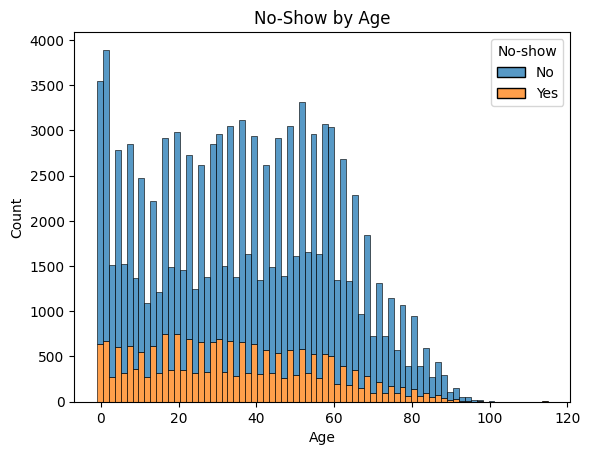

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# No-Show Rate by Age
sns.histplot(data=df, x="Age", hue="No-show", multiple="stack")
plt.title("No-Show by Age")
plt.show()


In [9]:
df.to_csv('Healthcare_NoShow_Cleaned.csv', index=False)
